In [1]:
%matplotlib widget

from PyNEC import nec_context
from nec2_antenna_simulator.setters import set_geometry, set_loads, set_frequency, set_ground, set_radiation_pattern, run
from nec2_antenna_simulator.getters import get_impedance, get_radiation_pattern
from nec2_antenna_simulator.metrics import reflection_coefficient, vswr, transmission_line
from nec2_antenna_simulator.viz import plot_nec_model_3d, plot_radiation_patterns

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

In [2]:
FEET_TO_METERS = 0.3048
PI = np.pi

In [21]:
APEX_ANGLE = 10
APEX_HEIGHT_METERS = 7
BRANCH_LENGTH_FEET = 100
Z0 = 300

X = BRANCH_LENGTH_FEET * FEET_TO_METERS * np.cos(2 * PI * APEX_ANGLE / 360)
Z = BRANCH_LENGTH_FEET * FEET_TO_METERS * np.sin(2 * PI * APEX_ANGLE / 360)
END_BRANCH_HEIGHT_METERS =  APEX_HEIGHT_METERS - Z

print(f"END_BRANCH_HEIGHT_METERS: {END_BRANCH_HEIGHT_METERS}")

END_BRANCH_HEIGHT_METERS: 1.7072035447119633


In [22]:
WIRES = [
    (100, -X, 0, END_BRANCH_HEIGHT_METERS, 0, 0, APEX_HEIGHT_METERS, 0.002, 1.0, 1.0),
    (100, X, 0, END_BRANCH_HEIGHT_METERS, 0, 0, APEX_HEIGHT_METERS, 0.002, 1.0, 1.0),
]

EXCITATIONS = [
    (0, 1, 100, 0, 1.0, 0, 0, 0, 0, 0)
]

LOADS = [

]

ground_conductivity = 0.002
ground_dielectric = 10
GROUND = (
    0, # Ground type
    0, # Number of radial wires
    13, # Relative permitivity (eps r)
    0.005, # Conductivity (S/m)
    0, 
    0, 
    0, 
    0
)

RAD_PATTERN = (
    0,  # calc_mode 
    91, # n_theta
    361, # n_phi
    0, # output_format
    0, # normalization
    0, # D 
    0, # A
    0.0, # theta0
    0.0, # phi0
    1.0, # delta_theta
    1.0, # delta_phi
    0.0, # radial_distance
    0 # gain_norm
)

In [23]:
freq_band_dict = {
    10: 28.050,
    12: 24.910,
    15: 21.050,
    17: 18.080,
    20: 24.050,
    30: 10.120,
    40: 7.050,
    60: 5.353,
    80: 3.050,
}

FREQUENCY = {}
necs = {}
for b, f in freq_band_dict.items():
    
    FREQUENCY = (
        0, # 0 linear, 1 logarithmic
        1, # Number of points
        f, # Start frequency (MHz)
        0, # Step (MHz) or multiplier
    )
    
    nec = nec_context()
    
    nec = set_geometry(nec=nec, wires=WIRES, excitations=EXCITATIONS)
    nec = set_loads(nec=nec, loads=LOADS)
    nec = set_frequency(nec=nec, frequency=FREQUENCY)
    nec = set_ground(nec=nec, ground=GROUND)
    nec = set_radiation_pattern(nec=nec, rad_pattern=RAD_PATTERN)
    
    nec = run(nec=nec)
    
    z = np.array([get_impedance(nec=nec, index=index) for index in range(FREQUENCY[1])]).reshape(-1)
    gamma = reflection_coefficient(z=z, z0=Z0)
    roe = vswr(z=z, z0=Z0)
    zin = transmission_line(z0=Z0, zl=z, l=28*FEET_TO_METERS, f_mhz=FREQUENCY[2])
    gammain = reflection_coefficient(z=zin, z0=Z0)
    roein = vswr(z=zin, z0=Z0)
    print(f"freq = {f}")
    print(f"\t- ZL = {np.round(z, 1)}, Γ = {np.round(gamma, 2)}, VSWR = {np.round(roe, 1)}")
    print(f"\t- Zin = {np.round(zin, 1)}, Γ = {np.round(gammain, 2)}, VSWR = {np.round(roein, 1)}")
    necs[b] = nec


freq = 28.05
	- ZL = [586.3+761.1j], Γ = [0.61+0.33j], VSWR = [5.6]
	- Zin = [53.9+14.7j], Γ = [-0.69+0.07j], VSWR = [5.6]
freq = 24.91
	- ZL = [1015.5-1280.j], Γ = [0.77-0.23j], VSWR = [8.9]
	- Zin = [34.-34.3j], Γ = [-0.78-0.18j], VSWR = [8.9]
freq = 21.05
	- ZL = [163.8-548.1j], Γ = [0.46-0.64j], VSWR = [8.4]
	- Zin = [45.2-152.2j], Γ = [-0.46-0.64j], VSWR = [8.4]
freq = 18.08
	- ZL = [408.3+730.2j], Γ = [0.59+0.42j], VSWR = [6.3]
	- Zin = [660.+866.7j], Γ = [0.66+0.31j], VSWR = [6.3]
freq = 24.05
	- ZL = [2387.6+272.2j], Γ = [0.78+0.02j], VSWR = [8.1]
	- Zin = [44.8-134.3j], Γ = [-0.51-0.59j], VSWR = [8.1]
freq = 10.12
	- ZL = [844.4-1905.7j], Γ = [0.86-0.23j], VSWR = [17.4]
	- Zin = [19.8+115.7j], Γ = [-0.66+0.6j], VSWR = [17.4]
freq = 7.05
	- ZL = [35.7-126.5j], Γ = [-0.56-0.59j], VSWR = [9.9]
	- Zin = [69.6+338.j], Γ = [0.12+0.81j], VSWR = [9.9]
freq = 5.353
	- ZL = [434.9-2034.1j], Γ = [0.91-0.26j], VSWR = [33.8]
	- Zin = [11.2-153.6j], Γ = [-0.55-0.77j], VSWR = [33.8]
freq = 3

# Antenna geometry

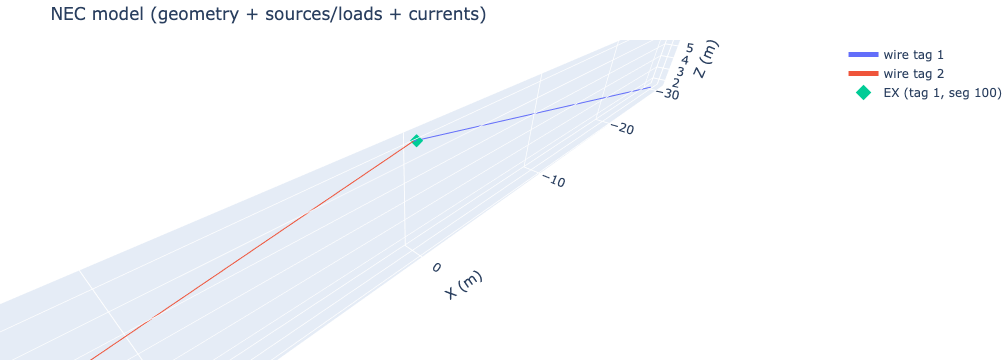

In [24]:
plot_nec_model_3d(wires=WIRES, excitations=EXCITATIONS, loads=LOADS, nec=nec)

# Radiation pattern

/work/nec2_antenna_simulator/src/nec2_antenna_simulator/viz.py:311: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



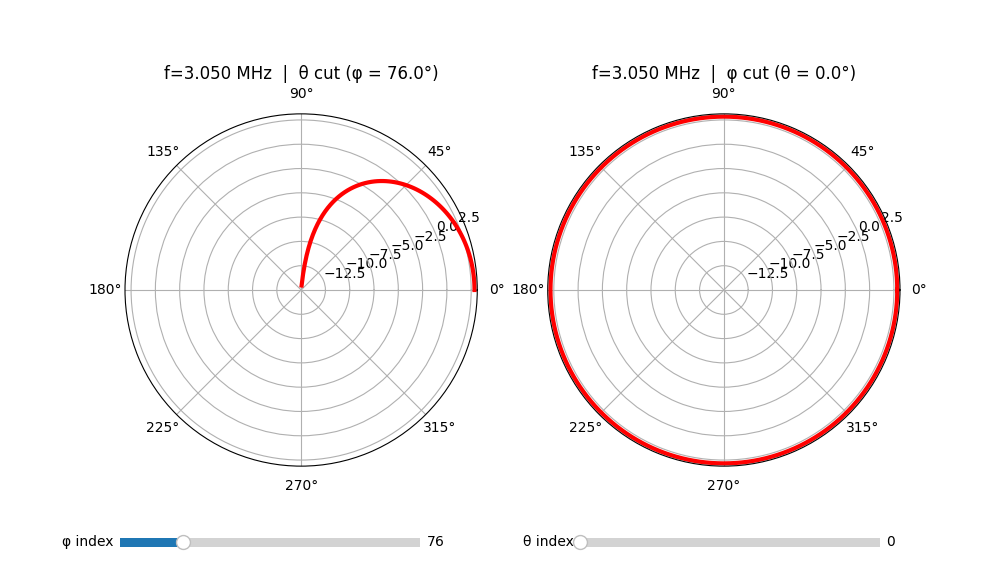

In [25]:
figs = {}
figs[10], _, _ = plot_radiation_patterns(nec=necs[10], freq_indices=None, figsize_per_row=(10, 5.8))
figs[12], _, _ = plot_radiation_patterns(nec=necs[12], freq_indices=None, figsize_per_row=(10, 5.8))
figs[15], _, _ = plot_radiation_patterns(nec=necs[15], freq_indices=None, figsize_per_row=(10, 5.8))
figs[17], _, _ = plot_radiation_patterns(nec=necs[17], freq_indices=None, figsize_per_row=(10, 5.8))
figs[20], _, _ = plot_radiation_patterns(nec=necs[20], freq_indices=None, figsize_per_row=(10, 5.8))
figs[30], _, _ = plot_radiation_patterns(nec=necs[30], freq_indices=None, figsize_per_row=(10, 5.8))
figs[40], _, _ = plot_radiation_patterns(nec=necs[40], freq_indices=None, figsize_per_row=(10, 5.8))
figs[60], _, _ = plot_radiation_patterns(nec=necs[60], freq_indices=None, figsize_per_row=(10, 5.8))
figs[80], _, _ = plot_radiation_patterns(nec=necs[80], freq_indices=None, figsize_per_row=(10, 5.8))

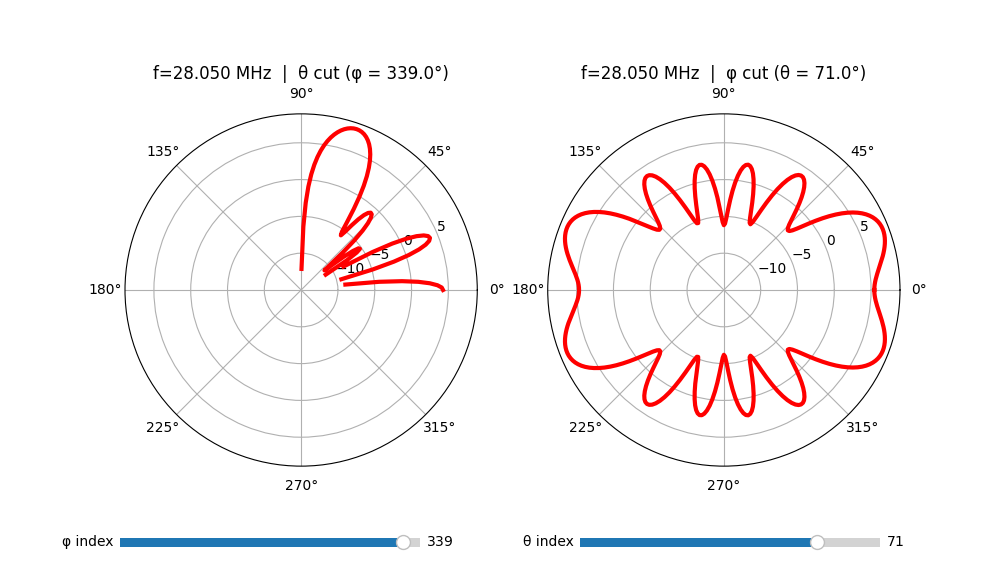

In [32]:
figs[10].show()